# General Health Study of Africa
### Study of the health evolution in Africa regarding the vaccination coverage of Hepatitis B, Polio, Diphtheria, the reported cases of Measles and the prevalence of HIV/AIDS.

## Dependencies

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Filtering of the DataFrame

In [3]:
# Display the CSV file
datafile_df = pd.read_csv("../Group_Project_1/Datafile1_per_region.csv")

datafile_df. head()

,Country,Year,Status,Life expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income Composition of Resources,Schooling,Region
0,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,...,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,Asia
1,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,...,8.13,64,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,Asia
2,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,...,8.52,67,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,Asia
3,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,...,7.87,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,Asia
4,Afghanistan,2010,Developing,58.8,279,74,0.01,79.679367,66,1989,...,9.20,66,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2,Asia


In [4]:
#Filter the DataFrame to only keep the countries from 'Africa' region
regions_to_include = ['Africa']

# Filter the DataFrame based on the regions in regions_to_include
africa_df = datafile_df[datafile_df['Region'].isin(regions_to_include)]

# Display the first few rows of the filtered DataFrame
africa_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income Composition of Resources,Schooling,Region
22,Algeria,2014,Developing,75.4,11,21,0.01,54.237318,95,0,...,7.21,95,0.1,547.851700,39113313.0,6.0,5.8,0.741,14.4,Africa
23,Algeria,2013,Developing,75.3,112,21,0.53,544.450743,95,25,...,7.12,95,0.1,5471.866766,38338562.0,5.9,5.8,0.737,14.4,Africa
24,Algeria,2012,Developing,75.1,113,21,0.66,555.926083,95,18,...,6.14,95,0.1,5564.825660,37565847.0,5.9,5.8,0.732,14.4,Africa
25,Algeria,2011,Developing,74.9,116,21,0.56,509.002041,95,112,...,5.29,95,0.1,5432.252300,36819558.0,5.9,5.8,0.724,14.0,Africa
26,Algeria,2010,Developing,74.7,119,21,0.45,430.717586,95,103,...,5.12,95,0.1,4463.394675,36117637.0,5.9,5.8,0.714,13.6,Africa


#  Study of Hepatitis vaccination coverage B within the African population

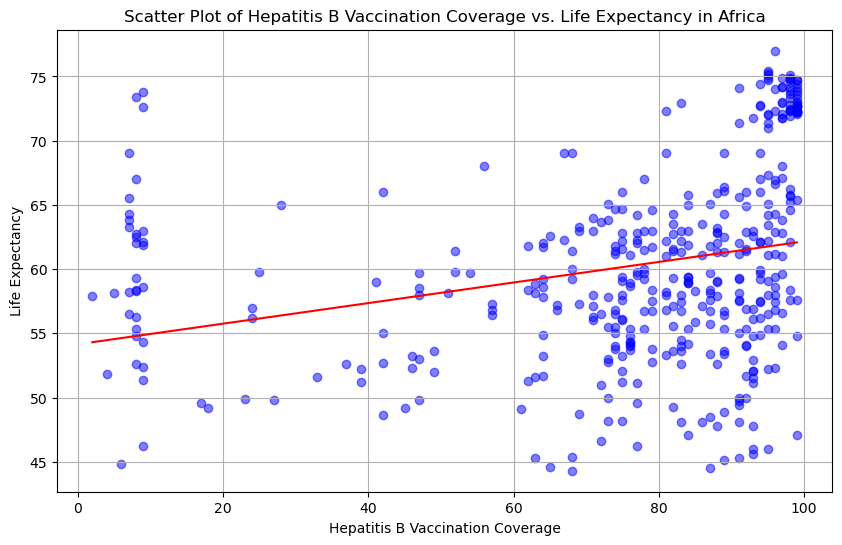

In [5]:
# Build scatter plot for Hepatitis B vaccination coverage vs. Life expectancy in Africa

plt.figure(figsize=(10, 6))
plt.scatter(africa_df['Hepatitis B'], africa_df['Life expectancy'], alpha=0.5, color='blue')
plt.xlabel('Hepatitis B Vaccination Coverage')
plt.ylabel('Life Expectancy')
plt.title('Scatter Plot of Hepatitis B Vaccination Coverage vs. Life Expectancy in Africa')

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(africa_df['Hepatitis B'], africa_df['Life expectancy'])
x_values = np.linspace(min(africa_df['Hepatitis B']), max(africa_df['Hepatitis B']), 100)
y_values = slope * x_values + intercept

# Plot the regression line
plt.plot(x_values, y_values, color='red', label=f'Regression Line (R-squared = {r_value**2:.2f})')

plt.grid(True)  

plt.show()

In [6]:
# Group the data by 'Year' and calculate the mean Hepatitis B vaccination coverage for each year
hepatitis_b_evolution = africa_df.groupby('Year')['Hepatitis B'].mean().reset_index()

hepatitis_b_evolution

,Year,Hepatitis B
0,2004,72.600000
1,2005,77.366667
2,2006,74.806452
3,2007,74.194444
4,2008,77.666667
5,2009,77.285714
6,2010,70.744186
7,2011,80.837209
8,2012,73.476190
9,2013,77.357143


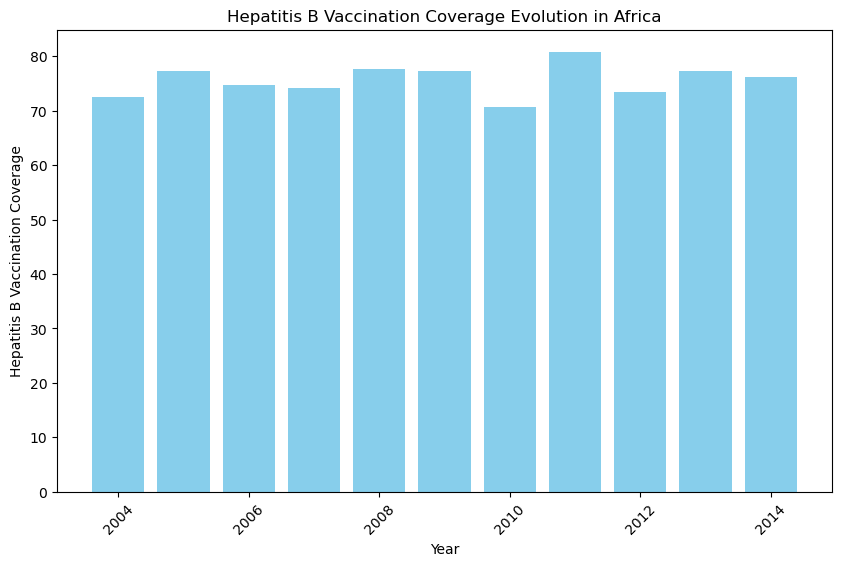

In [7]:
# Build bar plot for Hepatitis B vaccination coverage evolution per year in Africa

plt.figure(figsize=(10, 6))
plt.bar(hepatitis_b_evolution['Year'], hepatitis_b_evolution['Hepatitis B'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Hepatitis B Vaccination Coverage')
plt.title('Hepatitis B Vaccination Coverage Evolution in Africa')
plt.xticks(rotation=45)  

plt.show()

# Study of Polio vaccination coverage within the African population

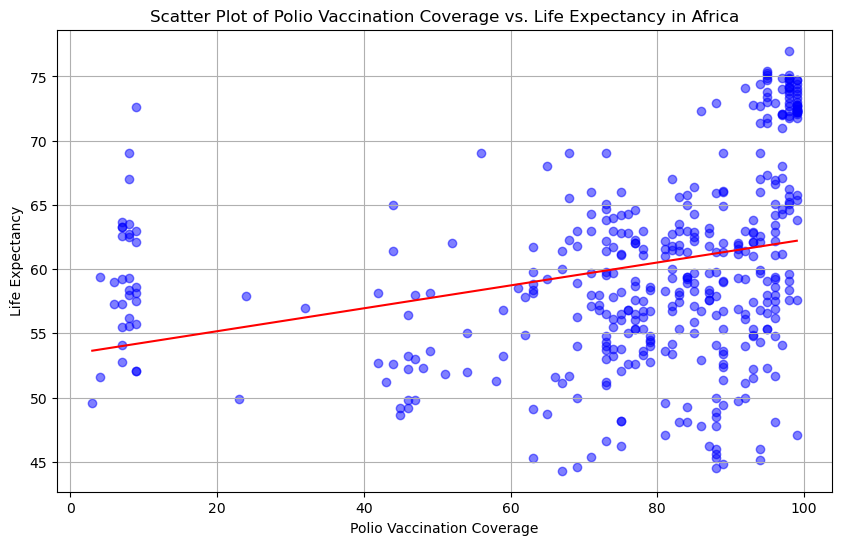

In [8]:
# Build scatter plot for Polio vaccination coverage vs. Life expectancy in Africa

plt.figure(figsize=(10, 6))
plt.scatter(africa_df['Polio'], africa_df['Life expectancy'], alpha=0.5, color='blue')
plt.xlabel('Polio Vaccination Coverage')
plt.ylabel('Life Expectancy')
plt.title('Scatter Plot of Polio Vaccination Coverage vs. Life Expectancy in Africa')

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(africa_df['Polio'], africa_df['Life expectancy'])
x_values = np.linspace(min(africa_df['Polio']), max(africa_df['Polio']), 100)
y_values = slope * x_values + intercept

# Plot the regression line
plt.plot(x_values, y_values, color='red', label=f'Regression Line (R-squared = {r_value**2:.2f})')

plt.grid(True)

plt.show()

In [9]:
# Group the data by 'Year' and calculate the mean of Polio vaccination coverage for each year

polio_evolution = africa_df.groupby('Year')['Polio'].mean().reset_index()

polio_evolution

,Year,Polio
0,2004,81.440000
1,2005,77.000000
2,2006,83.516129
3,2007,81.222222
4,2008,76.512821
5,2009,78.595238
6,2010,72.604651
7,2011,73.302326
8,2012,70.809524
9,2013,75.166667


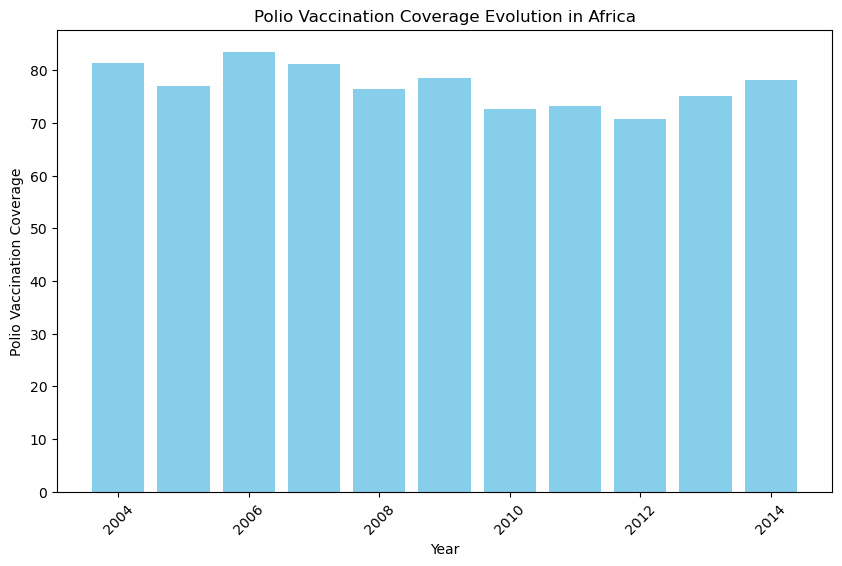

In [10]:
# Build bar plot for Polio vaccination coverage evolution per year in Africa

plt.figure(figsize=(10, 6))
plt.bar(polio_evolution['Year'], polio_evolution['Polio'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Polio Vaccination Coverage')
plt.title('Polio Vaccination Coverage Evolution in Africa')
plt.xticks(rotation=45)  

plt.show()

# Study of Diphteria vaccination coverage within the African population

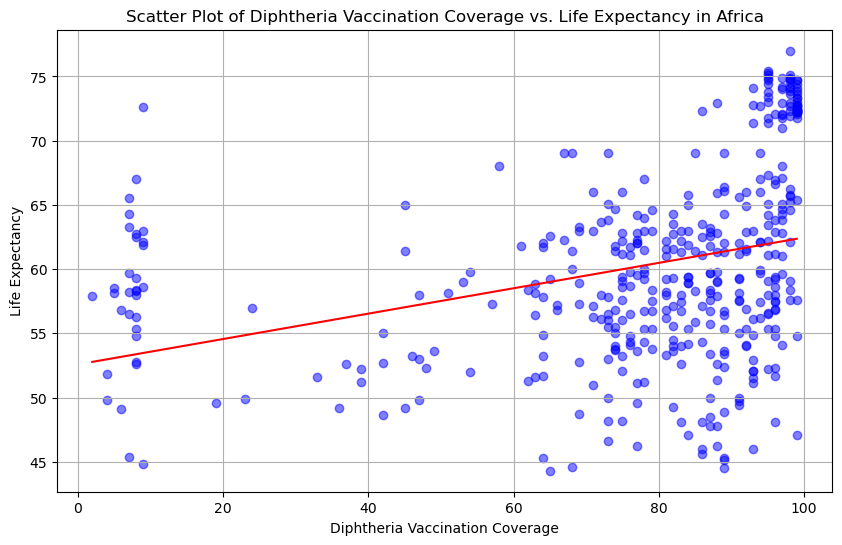

In [11]:
# Build scatter plot for Diphtheria vaccination coverage vs. Life expectancy in Africa

plt.figure(figsize=(10, 6))
plt.scatter(africa_df['Diphtheria'], africa_df['Life expectancy'], alpha=0.5, color='blue')
plt.xlabel('Diphtheria Vaccination Coverage')
plt.ylabel('Life Expectancy')
plt.title('Scatter Plot of Diphtheria Vaccination Coverage vs. Life Expectancy in Africa')

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(africa_df['Diphtheria'], africa_df['Life expectancy'])
x_values = np.linspace(min(africa_df['Diphtheria']), max(africa_df['Diphtheria']), 100)
y_values = slope * x_values + intercept

# Plot the regression line
plt.plot(x_values, y_values, color='red', label=f'Regression Line (R-squared = {r_value**2:.2f})')

plt.grid(True)

plt.show()

In [12]:
# Group the data by 'Year' and calculate the mean of Diphtheria vaccination coverage for each year

diphtheria_evolution = africa_df.groupby('Year')['Diphtheria'].mean().reset_index()

diphtheria_evolution

,Year,Diphtheria
0,2004,78.520000
1,2005,75.200000
2,2006,78.032258
3,2007,80.027778
4,2008,80.820513
5,2009,76.571429
6,2010,71.860465
7,2011,80.697674
8,2012,73.261905
9,2013,78.714286


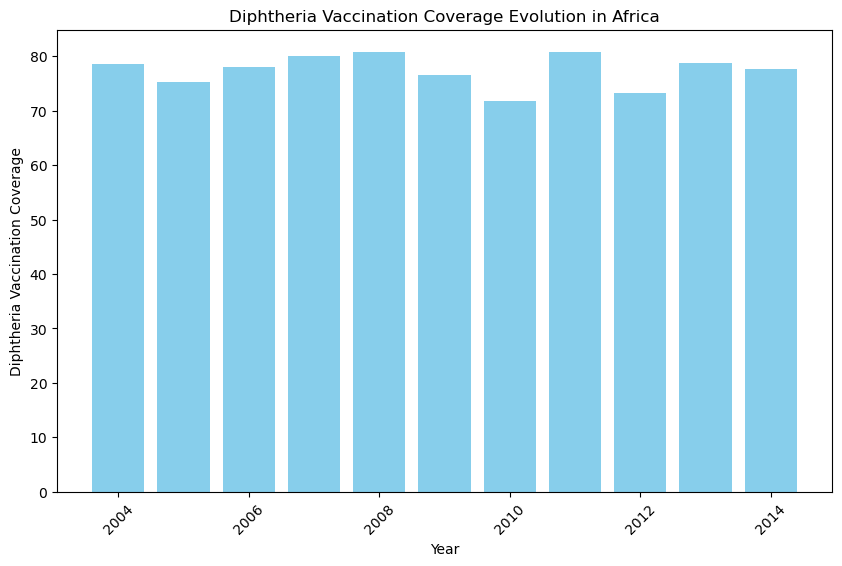

In [13]:
# Build bar plot for Diphtheria vaccination coverage evolution per year in Africa

plt.figure(figsize=(10, 6))
plt.bar(diphtheria_evolution['Year'], diphtheria_evolution['Diphtheria'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Diphtheria Vaccination Coverage')
plt.title('Diphtheria Vaccination Coverage Evolution in Africa')
plt.xticks(rotation=45)  

plt.show()

# Comparison of the previous studies within the timeframe 2004-2014

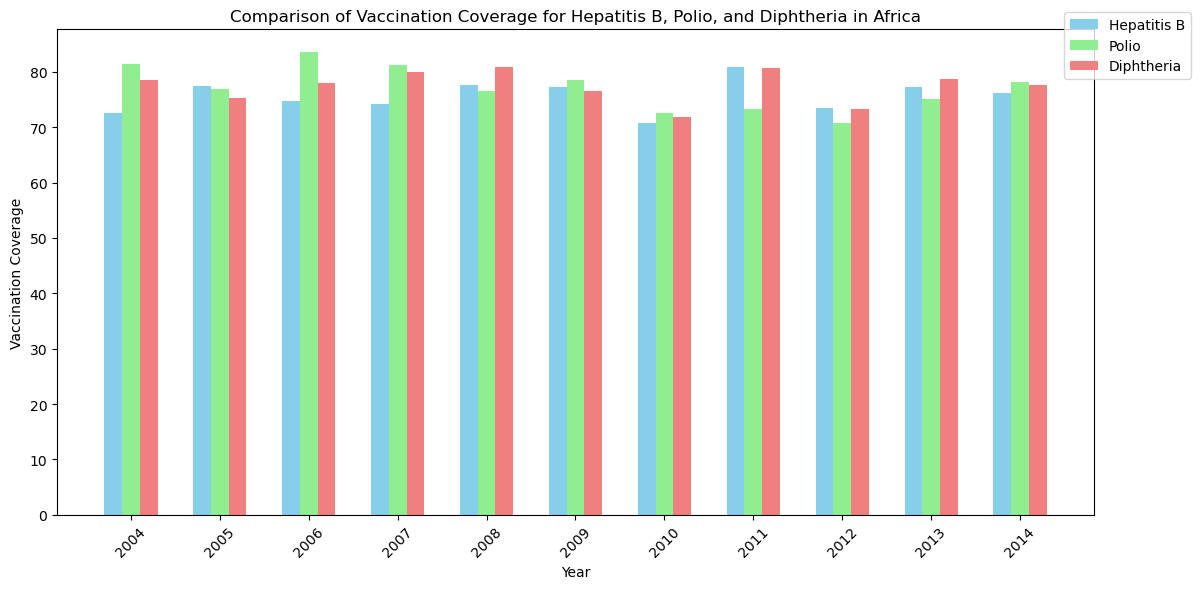

In [14]:
# Comparison of the vaccination coverages for Hepatitis B, Polio and Diphtheria

fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.2
years = hepatitis_b_evolution['Year']

# Plot Hepatitis B data
ax.bar(years - bar_width, hepatitis_b_evolution['Hepatitis B'], width=bar_width, color='skyblue', label='Hepatitis B')

# Plot Polio data
ax.bar(years, polio_evolution['Polio'], width=bar_width, color='lightgreen', label='Polio')

# Plot Diphtheria data
ax.bar(years + bar_width, diphtheria_evolution['Diphtheria'], width=bar_width, color='lightcoral', label='Diphtheria')

# Set x-axis labels, title, and legend
ax.set_xlabel('Year')
ax.set_ylabel('Vaccination Coverage')
ax.set_title('Comparison of Vaccination Coverage for Hepatitis B, Polio, and Diphtheria in Africa')
ax.set_xticks(years)
ax.set_xticklabels(years, rotation=45)
ax.legend(bbox_to_anchor=(1.1, 1.05))

plt.tight_layout()
plt.show()

# Study of the prevalance of HIV/AIDS within the African population

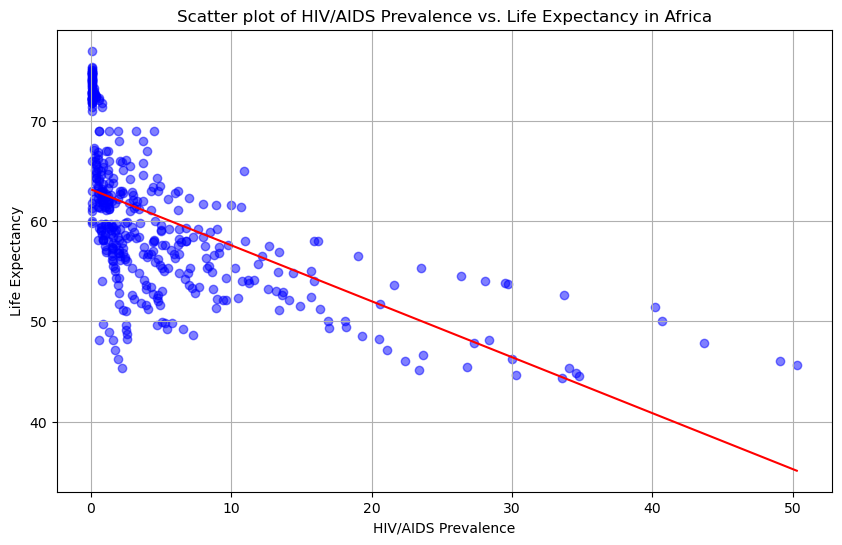

In [15]:
# Build scatter plot for HIV/AIDS prevalence(percentage) vs. Life expectancy in Africa

plt.figure(figsize=(10, 6))
plt.scatter(africa_df['HIV/AIDS'], africa_df['Life expectancy'], alpha=0.5, color='blue')
plt.xlabel('HIV/AIDS Prevalence')
plt.ylabel('Life Expectancy')
plt.title('Scatter plot of HIV/AIDS Prevalence vs. Life Expectancy in Africa')

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(africa_df['HIV/AIDS'], africa_df['Life expectancy'])
x_values = np.linspace(min(africa_df['HIV/AIDS']), max(africa_df['HIV/AIDS']), 100)
y_values = slope * x_values + intercept

# Plot the regression line
plt.plot(x_values, y_values, color='red', label=f'Regression Line (R-squared = {r_value**2:.2f})')

plt.grid(True)

plt.show()

In [16]:
# Group the data by 'Year' and calculate the mean of HIV/AIDS prevalence for each year

hivaids_evolution = africa_df.groupby('Year')['HIV/AIDS'].mean().reset_index()

hivaids_evolution

,Year,HIV/AIDS
0,2004,10.556000
1,2005,9.653333
2,2006,8.632258
3,2007,7.141667
4,2008,6.264103
5,2009,5.219048
6,2010,4.274419
7,2011,3.565116
8,2012,2.966667
9,2013,2.457143


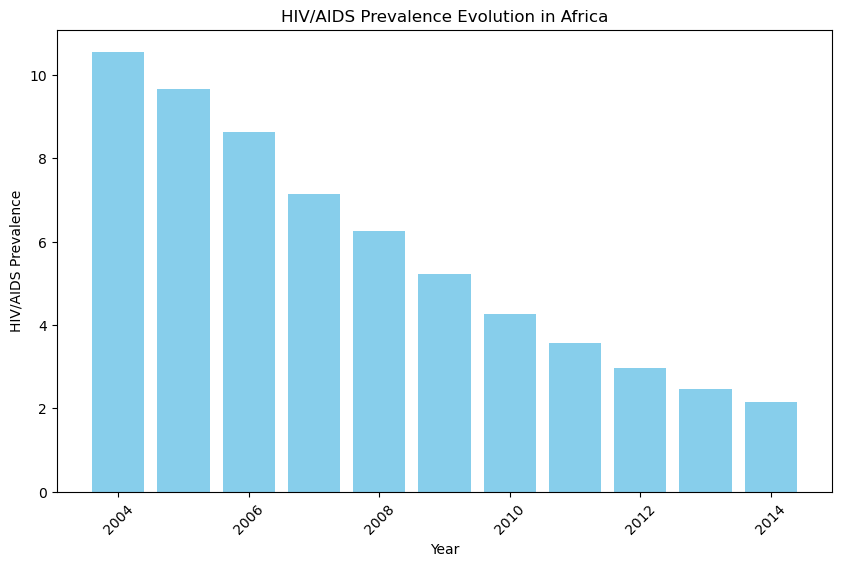

In [17]:
# Build bar plot for HIV/AIDS prevalence evolution per year in Africa

plt.figure(figsize=(10, 6))
plt.bar(hivaids_evolution['Year'], hivaids_evolution['HIV/AIDS'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('HIV/AIDS Prevalence')
plt.title('HIV/AIDS Prevalence Evolution in Africa')
plt.xticks(rotation=45)  

plt.show()

# Study of the Measles reported cases within the African population

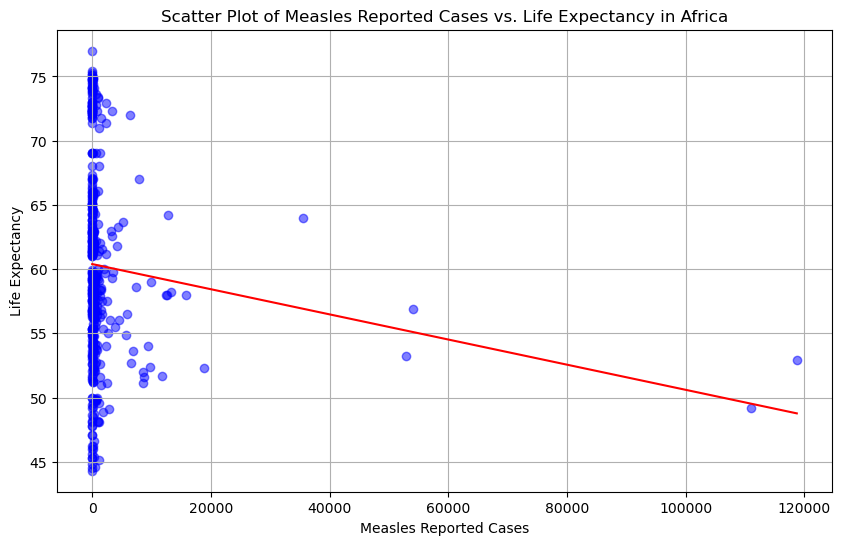

In [18]:
# Build scatter plot for Measles reported cases vs. Life expectancy in Africa

plt.figure(figsize=(10, 6))
plt.scatter(africa_df['Measles'], africa_df['Life expectancy'], alpha=0.5, color='blue')
plt.xlabel('Measles Reported Cases')
plt.ylabel('Life Expectancy')
plt.title('Scatter Plot of Measles Reported Cases vs. Life Expectancy in Africa') 

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(africa_df['Measles'], africa_df['Life expectancy'])
x_values = np.linspace(min(africa_df['Measles']), max(africa_df['Measles']), 100)
y_values = slope * x_values + intercept

# Plot the regression line
plt.plot(x_values, y_values, color='red', label=f'Regression Line (R-squared = {r_value**2:.2f})')

plt.grid(True)  

plt.show()

In [19]:
# Group the data by 'Year' and calculate the mean of Measles reported cases for each year

measles_evolution = africa_df.groupby('Year')['Measles'].mean().reset_index()

measles_evolution

,Year,Measles
0,2004,2311.120000
1,2005,4325.433333
2,2006,453.548387
3,2007,402.388889
4,2008,537.102564
5,2009,1866.500000
6,2010,4506.837209
7,2011,1373.000000
8,2012,761.880952
9,2013,1944.880952


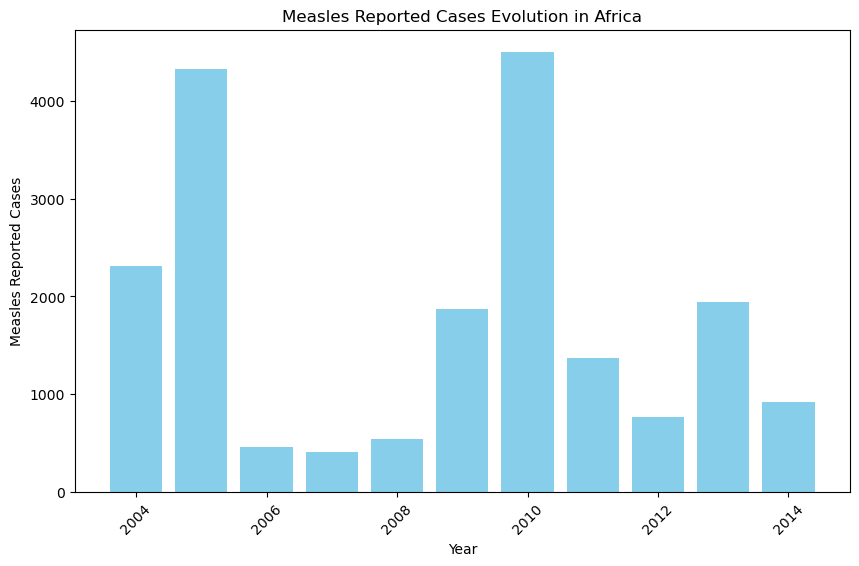

In [20]:
# Build bar plot for Measles reported cases evolution per year in Africa

plt.figure(figsize=(10, 6))
plt.bar(measles_evolution['Year'], measles_evolution['Measles'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Measles Reported Cases')
plt.title('Measles Reported Cases Evolution in Africa')
plt.xticks(rotation=45)  

plt.show()

In [28]:
africa_df_copy = africa_df.copy() #to avoid errors

# Calculate Measles Cases per Capita in the copied DataFrame
africa_df_copy['Measles per Capita'] = (africa_df_copy['Measles'] / africa_df_copy['Population']) * 1000

# Display the updated DataFrame with the new column
print(africa_df_copy[['Country', 'Year', 'Measles', 'Population', 'Measles per Capita']])

# Calculate the mean for the entire Africa DataFrame
mean_measles_per_capita = africa_df_copy['Measles per Capita'].mean()

# Display the mean value
print(f"Mean Measles per Capita: {mean_measles_per_capita:.2f}")

       Country  Year  Measles  Population  Measles per Capita
22     Algeria  2014        0  39113313.0            0.000000
23     Algeria  2013       25  38338562.0            0.000652
24     Algeria  2012       18  37565847.0            0.000479
25     Algeria  2011      112  36819558.0            0.003042
26     Algeria  2010      103  36117637.0            0.002852
...        ...   ...      ...         ...                 ...
1011  Zimbabwe  2008        0  13558469.0            0.000000
1012  Zimbabwe  2007      242   1332999.0            0.181546
1013  Zimbabwe  2006      212  13124267.0            0.016153
1014  Zimbabwe  2005      420    129432.0            3.244947
1015  Zimbabwe  2004       31  12777511.0            0.002426

[416 rows x 5 columns]
Mean Measles per Capita: 3.79


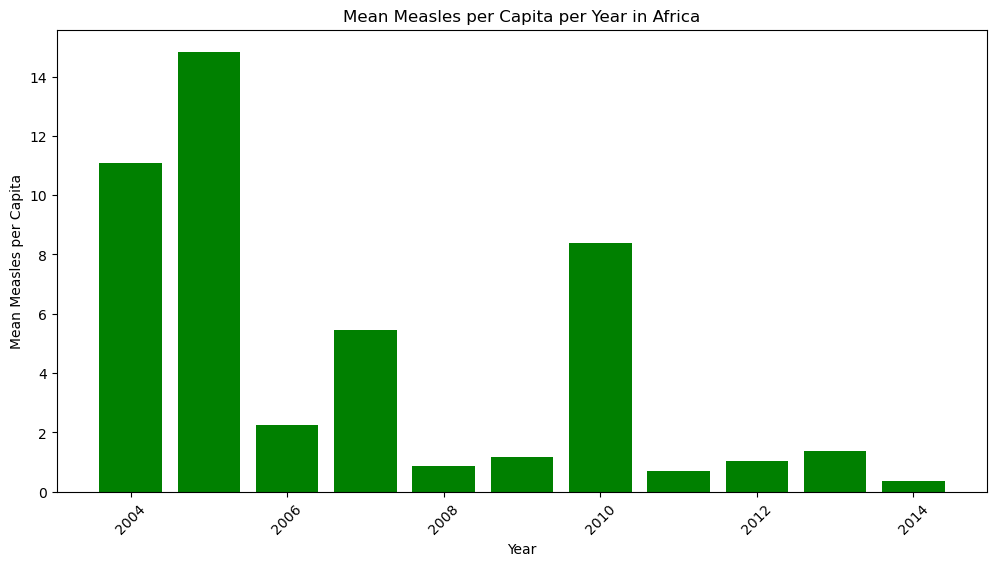

In [33]:
# Group the data by 'Year' and calculate the mean for 'Measles per Capita'
mean_measles_by_year = africa_df.groupby('Year')['Measles per Capita'].mean().reset_index()

# Create a bar plot for the mean Measles per Capita per year
plt.figure(figsize=(12, 6))
plt.bar(mean_measles_by_year['Year'], mean_measles_by_year['Measles per Capita'], color='green')
plt.xlabel('Year')
plt.ylabel('Mean Measles per Capita')
plt.title('Mean Measles per Capita per Year in Africa')
plt.xticks(rotation=45)
plt.show()